In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [161]:
#imports the preprocessed data
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)
y_train = y_train['price']
y_test = y_test['price']

In [162]:
# Create linear regression object and train the model using the training sets
regr = LinearRegression()
regr.fit(X_train, y_train)
ypred = regr.predict(X_test)

In [163]:
#elvaluate the model
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Mean squared error:  707835.6906451926
R2 score:  0.47267545650446574


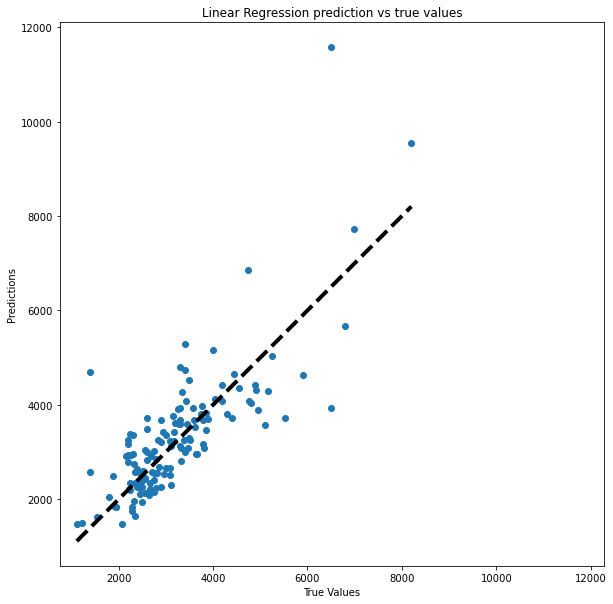

In [164]:
#creates a scatter plot of the test data and the predicted data
plt.figure(figsize=(10, 10))
plt.scatter(y_test, ypred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Linear Regression prediction vs true values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.show()

In [165]:
#use grid search to find the best parameters for the KNN model
param_grid = {'n_neighbors': np.arange(1, 25), 'weights': ['uniform', 'distance']}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, scoring = 'r2')
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print('R2 score: ', knn_cv.best_score_)

{'n_neighbors': 3, 'weights': 'distance'}
R2 score:  0.2744657431586064


In [166]:
#predict the test data using the best parameters
ypred = knn_cv.predict(X_test)

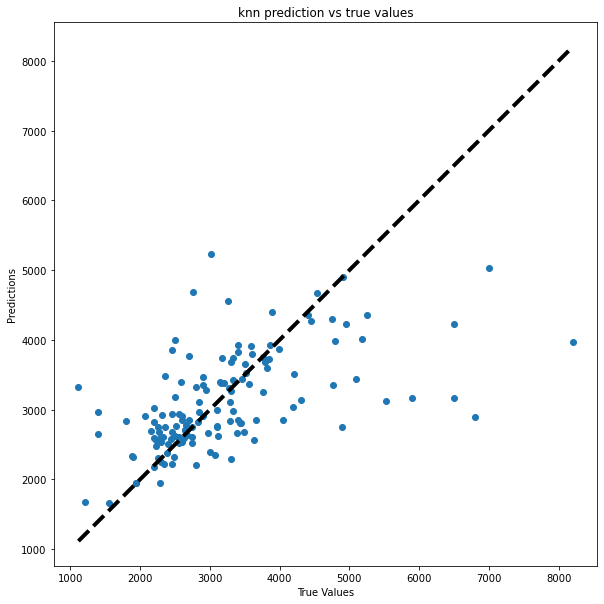

In [167]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, ypred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('knn prediction vs true values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.show()

In [168]:
#use grid search to find the best parameters for the SVM model
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
svm = SVR()
svm_cv = GridSearchCV(svm, param_grid, scoring = 'r2')
svm_cv.fit(X_train, y_train)
print(svm_cv.best_params_)
print('R2 score: ', svm_cv.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
R2 score:  0.10423247705475487


In [169]:
#predict the test data using the best parameters
ypred = svm_cv.predict(X_test)

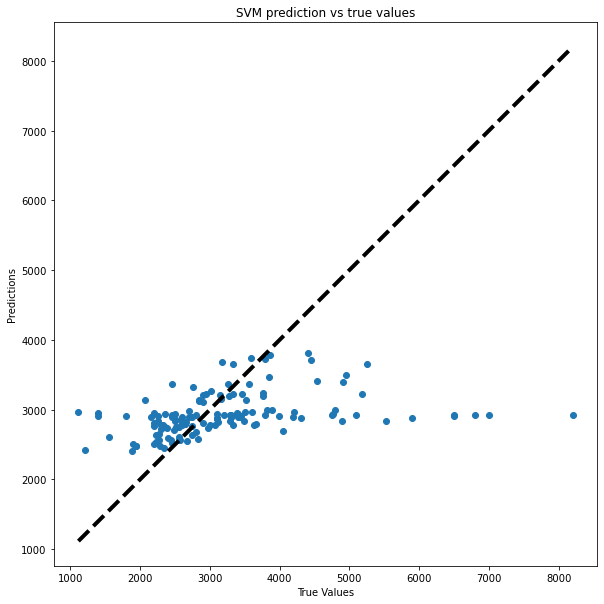

In [170]:
#creates a scatter plot of the test data and the predicted data
plt.figure(figsize=(10, 10))
plt.scatter(y_test, ypred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('SVM prediction vs true values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.show()


In [171]:
#use grid search to find the best parameters for the Random Forest model
param_grid = {'n_estimators': [100, 200, 300, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf, param_grid, scoring = 'r2')
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
print('R2 score: ', rf_cv.best_score_)

{'max_features': 'sqrt', 'n_estimators': 100}
R2 score:  0.6676783286362257


In [172]:
#predict the test data using the best parameters
ypred = rf_cv.predict(X_test)

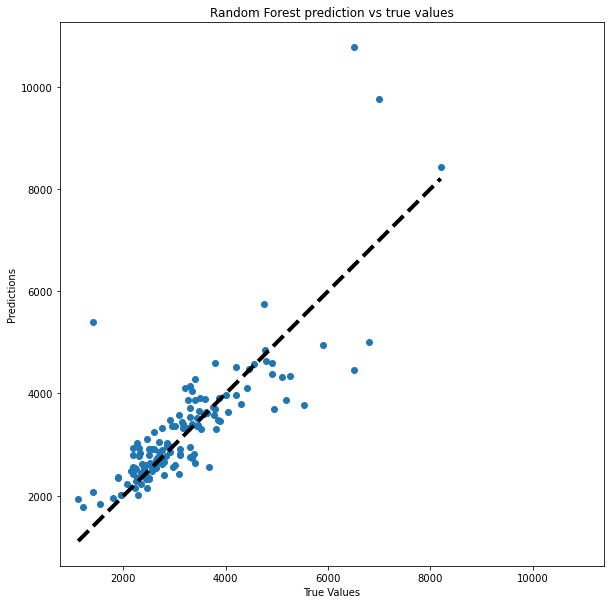

In [173]:
#creates a scatter plot of the test data and the predicted data
plt.figure(figsize=(10, 10))
plt.scatter(y_test, ypred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Random Forest prediction vs true values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.show()


In [174]:
#shows the importance of each feature in the Random Forest model
importances = rf_cv.best_estimator_.feature_importances_
print(importances)
X_train.columns


[0.1865566  0.10414941 0.01439473 0.31554465 0.07806886 0.06722088
 0.09267412 0.14139075]


Index(['bathrooms', 'bedrooms', 'pets_allowed', 'square_feet', 'address',
       'cityname', 'latitude', 'longitude'],
      dtype='object')

In [181]:
#use grid search to find the best parameters for the KMeans model
param_grid = {'n_clusters': np.arange(1, 25)}
kmeans = KMeans()
kmeans_cv = GridSearchCV(kmeans, param_grid, scoring = 'r2')
kmeans_cv.fit(X_train, y_train)
print(kmeans_cv.best_params_)
print('R2 score: ', kmeans_cv.best_score_)

{'n_clusters': 24}
R2 score:  -7.112057368648062


In [212]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering()
agg.fit(X_train)
agg.fit_predict(X_train)



array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

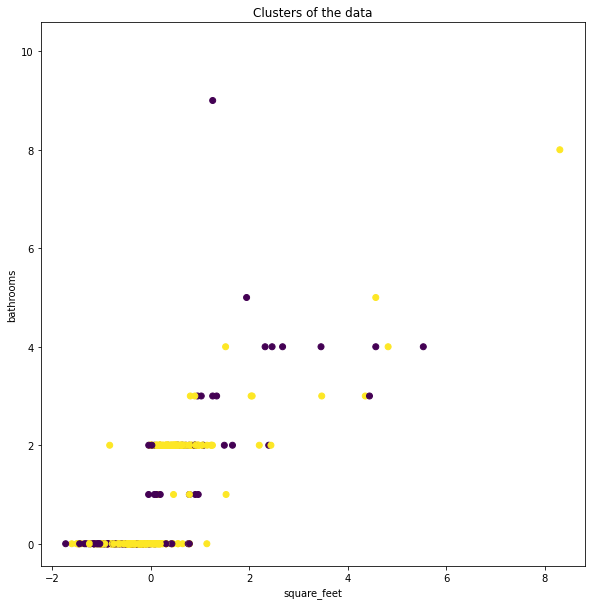

In [211]:
#create a scatter plot of the clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_train['square_feet'], X_train['bathrooms'], c=agg.labels_, cmap='viridis') 
plt.title('Clusters of the data')
plt.xlabel('square_feet')
plt.ylabel('bathrooms')
plt.axis('equal')
plt.axis('square')
plt.show()
